# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


From https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ :

"Pandas groupby is used for grouping the data according to the categories and applying a function to the categories. It also helps to aggregate data efficiently. The Pandas groupby() is a very powerful function with a lot of variations. It makes the task of splitting the Dataframe over some criteria really easy and efficient."

Feel free to use that geeksforgeeks link as an additional resource.

In [1]:
import numpy as np
import scipy.stats as stats

import pandas as pd
import matplotlib.pyplot as plt

Let's import some data.  There are tons of datasets on 538's website. [link text](https://data.fivethirtyeight.com/)

In this notebook, we'll explore the 2022 NFL predictions. Feel free to use the syntax below to grab another one on that website, and play.

In [2]:
download_url = "https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv"
nfl_df =  pd.read_csv(download_url)

### Import data.

In [3]:
np.shape(nfl_df)

(17379, 33)

See the first 10 rows

In [4]:
nfl_df.head(10)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947,1300.000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,43,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,BFF,WBU,1478.004,1300.000,0.802000,0.198000,...,NaN,NaN,NaN,NaN,NaN,32,6,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002,1504.908,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,RII,MUN,1516.108,1478.004,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
5,1920-10-03,1920,0,NaN,RCH,ABU,1503.420,1300.000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,10,0,NaN,NaN,NaN
6,1920-10-03,1920,0,NaN,CHI,MUT,1368.333,1300.000,0.682986,0.317014,...,NaN,NaN,NaN,NaN,NaN,20,0,NaN,NaN,NaN
7,1920-10-03,1920,0,NaN,CBD,PTQ,1504.688,1300.000,0.825267,0.174733,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
8,1920-10-10,1920,0,NaN,RII,HAM,1542.135,1444.259,0.718613,0.281387,...,NaN,NaN,NaN,NaN,NaN,26,0,NaN,NaN,NaN
9,1920-10-10,1920,0,NaN,CHI,KEW,1386.533,1300.000,0.705223,0.294777,...,NaN,NaN,NaN,NaN,NaN,25,7,NaN,NaN,NaN


We can use existing columns to calculate new data and, if appropriate, save it to the dataframe.  For example...

In [5]:
nfl_df['score_diff'] =  nfl_df['score1'] - nfl_df['score2']
nfl_df.head()['score_diff']

0    48
1    43
2    26
3    14
4    45
Name: score_diff, dtype: int64

# Making a groupby and playing with a single group's data
Nice.  Now, let's have a look at a single team's statistics.  Obviously, we'll look at Buffalo!  Specifically, let's look at their home games.  The dataset stores the home team under the column label, 'team1'.  So, let's groupby team1.

In [6]:
gb_team = nfl_df.groupby('team1')



```
# This is formatted as code
```

Inspect the group keys.

In [7]:
gb_team.groups.keys()

dict_keys(['AKR', 'ARI', 'ATL', 'BAL', 'BBA', 'BCL', 'BDA', 'BFF', 'BKN', 'BRL', 'BUF', 'BYK', 'CAR', 'CBD', 'CHB', 'CHI', 'CHL', 'CHT', 'CIB', 'CIN', 'CLE', 'CLI', 'COL', 'CRA', 'CRP', 'CST', 'CTI', 'DAL', 'DAY', 'DEN', 'DET', 'DHR', 'DPN', 'DTI', 'DTX', 'DUL', 'DWL', 'ECG', 'ELY', 'FTW', 'FYJ', 'GAR', 'GB', 'GUN', 'HAM', 'HOU', 'HRT', 'IND', 'JAX', 'KC', 'KCB', 'KEN', 'LAC', 'LAR', 'LDA', 'LOG', 'LOU', 'MIA', 'MIL', 'MIN', 'MNM', 'MNN', 'MSA', 'MUN', 'NAA', 'NE', 'NG1', 'NO', 'NYA', 'NYG', 'NYJ', 'NYY', 'OAK', 'OOR', 'PHI', 'PIT', 'PRV', 'PTB', 'PUL', 'RAC', 'RCH', 'RCK', 'RED', 'RIC', 'RII', 'ROS', 'SEA', 'SEN', 'SF', 'SIS', 'SLA', 'STG', 'TB', 'TEN', 'THO', 'TOL', 'TOR', 'UAP', 'WGC', 'WSH', 'ZAN'])

Here's how you can use the keys above to grab a specific group.  These keys can be used with <groupby>.get_group(key) to grab the data specific to one group.

In [8]:
buf = gb_team.get_group('BUF')
buf.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating,score_diff
2910,1960-09-18,1960,0,NaN,BUF,DEN,1274.517,1316.927,0.532464,0.467536,...,30.783968,34.275467,1249.598530,1336.820547,21,27,0.0,NaN,NaN,-6
2923,1960-10-02,1960,0,NaN,BUF,LAC,1290.453,1268.952,0.621975,0.378025,...,16.933076,18.699858,1250.229215,1305.852498,10,24,0.0,NaN,NaN,-14
2948,1960-10-16,1960,0,NaN,BUF,NYJ,1255.388,1317.500,0.504156,0.495844,...,-3.864508,77.820736,1236.042345,1334.355875,13,17,0.0,NaN,NaN,-4
2954,1960-10-23,1960,0,NaN,BUF,OAK,1239.138,1266.212,0.554364,0.445636,...,19.529885,16.079704,1268.527098,1239.186265,38,9,0.0,NaN,NaN,29
2965,1960-10-30,1960,0,NaN,BUF,TEN,1268.938,1400.845,0.404886,0.595114,...,26.609146,80.211936,1278.033918,1383.506566,25,24,0.0,NaN,NaN,1


Nice!  We can use this dataframe to explore data specific to Buffalo home games.  

In [9]:
buf['score1']

2910     21
2923     10
2948     13
2954     38
2965     25
         ..
17296    20
17306    32
17354    35
17368    34
17374    10
Name: score1, Length: 503, dtype: int64

Let's plot score difference over time.

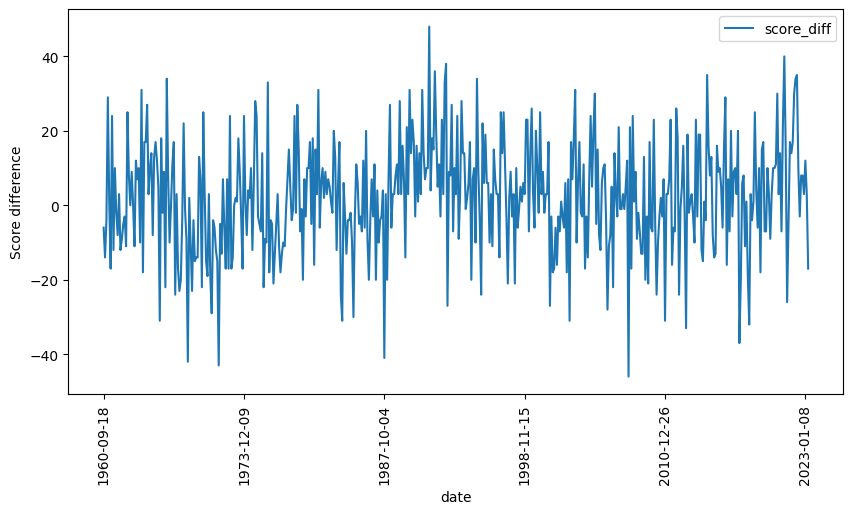

In [10]:
plt.rcParams["figure.figsize"] = (10,5)

# from re import X
buf.plot(x='date',y='score_diff')
plt.ylabel('Score difference');
plt.xlabel('date');
plt.xticks(rotation=90);

# Getting aggregate data for groups.

You can take advantage of Pandas convenience functions.  For example, here's a method to get descriptive statistics of every column.

In [11]:
gb_team.describe()

season                                                                  \
       count         mean        std     min     25%     50%     75%     max   
team1                                                                          
AKR     23.0  1922.260870   2.071833  1920.0  1920.5  1922.0  1924.0  1926.0   
ARI    697.0  1975.738881  29.854688  1920.0  1953.0  1979.0  2001.0  2022.0   
ATL    452.0  1994.944690  16.298193  1966.0  1981.0  1995.0  2009.0  2022.0   
BAL    226.0  2009.053097   7.790981  1996.0  2002.0  2009.0  2016.0  2022.0   
BBA     27.0  1947.444444   1.120897  1946.0  1946.5  1947.0  1948.0  1949.0   
...      ...          ...        ...     ...     ...     ...     ...     ...   
TOR     11.0  1929.545455   0.522233  1929.0  1929.0  1930.0  1930.0  1930.0   
UAP      1.0  1920.000000        NaN  1920.0  1920.0  1920.0  1920.0  1920.0   
WGC      1.0  1920.000000        NaN  1920.0  1920.0  1920.0  1920.0  1920.0   
WSH    675.0  1979.945185  25.874812  1932.0  1959.0  1982.0  2002.0  2022.0   
ZAN      2.0  1920.000000   0.000000  1920.0  1920.0  1920.0  1920.0  1920.0   

      neutral            ... total_rating       score_diff             \
        count      mean  ...          75%   max      count       mean   
team1                    ...                                            
AKR      23.0  0.000000  ...          NaN   NaN       23.0  14.521739   
ARI     697.0  0.001435  ...         73.0  87.0      697.0  -0.071736   
ATL     452.0  0.006637  ...         40.0  58.0      452.0  -0.099558   
BAL     226.0  0.008850  ...         81.0  90.0      226.0   6.676991   
BBA      27.0  0.000000  ...          NaN   NaN       27.0   1.666667   
...       ...       ...  ...          ...   ...        ...        ...   
TOR      11.0  0.000000  ...          NaN   NaN       11.0  -8.000000   
UAP       1.0  0.000000  ...          NaN   NaN        1.0   6.000000   
WGC       1.0  0.000000  ...          NaN   NaN        1.0   0.000000   
WSH     675.0  0.007407  ...         61.0  73.0      675.0   1.442963   
ZAN       2.0  0.000000  ...          NaN   NaN        2.0  -5.000000   

                                                 
             std   min   25%   50%    75%   max  
team1                                            
AKR    19.755021 -22.0   4.5  13.0  22.00  62.0  
ARI    14.844327 -42.0  -9.0   0.0   8.00  60.0  
ATL    14.920077 -42.0  -8.0   1.0   7.25  42.0  
BAL    13.983708 -34.0  -3.0   6.0  15.75  45.0  
BBA    16.590080 -29.0  -7.5   0.0  10.00  35.0  
...          ...   ...   ...   ...    ...   ...  
TOR    12.263768 -32.0 -13.5  -6.0   0.00   7.0  
UAP          NaN   6.0   6.0   6.0   6.00   6.0  
WGC          NaN   0.0   0.0   0.0   0.00   0.0  
WSH    15.343764 -73.0  -7.0   2.0  10.00  45.0  
ZAN     7.071068 -10.0  -7.5  -5.0  -2.50   0.0  

[101 rows x 224 columns]

SO much data!  Perhaps we only want the means of one column.

In [12]:
gb_team['score_diff'].mean()

team1
AKR    14.521739
ARI    -0.071736
ATL    -0.099558
BAL     6.676991
BBA     1.666667
         ...    
TOR    -8.000000
UAP     6.000000
WGC     0.000000
WSH     1.442963
ZAN    -5.000000
Name: score_diff, Length: 101, dtype: float64

Alternatively, you can also use the <groupby>.agg() method to perforamn calculations Within each group.  Here's an example for how to count the number of rows/samples for each group by passing in the len method.

In [13]:
gb_team['score_diff'].agg(len)

team1
AKR     23
ARI    697
ATL    452
BAL    226
BBA     27
      ... 
TOR     11
UAP      1
WGC      1
WSH    675
ZAN      2
Name: score_diff, Length: 101, dtype: int64

You can pass in any method!  For example, numpy mean...

In [14]:
gb_team['score_diff'].agg(np.mean)

team1
AKR    14.521739
ARI    -0.071736
ATL    -0.099558
BAL     6.676991
BBA     1.666667
         ...    
TOR    -8.000000
UAP     6.000000
WGC     0.000000
WSH     1.442963
ZAN    -5.000000
Name: score_diff, Length: 101, dtype: float64

You can also create your own methods to be applied to each group of data.  Here's an example.

In [15]:
def calc_mean(group_data_in):
  return np.mean(group_data_in)

gb_team['score_diff'].agg(calc_mean)

team1
AKR    14.521739
ARI    -0.071736
ATL    -0.099558
BAL     6.676991
BBA     1.666667
         ...    
TOR    -8.000000
UAP     6.000000
WGC     0.000000
WSH     1.442963
ZAN    -5.000000
Name: score_diff, Length: 101, dtype: float64

# Getting aggregate data that describes each independent group

What if you want the within-group means?  Here's one way to get that information...

In [16]:
  score_diff_means_df = gb_team['score_diff'].agg(np.mean)
  score_diff_means_df # This is a series object


team1
AKR    14.521739
ARI    -0.071736
ATL    -0.099558
BAL     6.676991
BBA     1.666667
         ...    
TOR    -8.000000
UAP     6.000000
WGC     0.000000
WSH     1.442963
ZAN    -5.000000
Name: score_diff, Length: 101, dtype: float64

You can run multiple aggregate functions at once.

In [17]:
gb_team['score_diff'].agg([np.mean, np.std, stats.sem])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,mean,std,sem
team1,,,
AKR,14.521739,19.755021,4.119207
ARI,-0.071736,14.844327,0.562269
ATL,-0.099558,14.920077,0.701781
BAL,6.676991,13.983708,0.930182
BBA,1.666667,16.590080,3.192762
...,...,...,...
TOR,-8.000000,12.263768,3.697665
UAP,6.000000,NaN,NaN
WGC,0.000000,NaN,NaN


sats.sem returns errors for some teams!  Why is that?

In [18]:
gb_team['score_diff'].get_group('UAP')
# ...oh, those teams have only one game.
# You can't really calculate the mean, std, or serr when n=1

86    6
Name: score_diff, dtype: int64

Get specific data using the usual syntax:
`<dataframe>['column_name']['row_name']`

In [19]:
gb_summary_stats = gb_team['score_diff'].agg([np.mean, np.std, stats.sem])

buf_mean = gb_summary_stats['mean']['BUF']
buf_std = gb_summary_stats['std']['BUF']

print(f'BUF mean (std): {buf_mean:.2f}({buf_std:.2f})')

BUF mean (std): 2.10(15.09)


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Iterating through groups in a groupby

Sometimes, you might want to iterate through groups.  Let's try it!
Here, I'm printing out some data, but note that I'm also storing it by appending it to the list *within_group_means*.  

The downside of this approach is that the list stores only the values, and not the associated team label.  

In [20]:
gb_team

within_group_means = []

gb_team = nfl_df.groupby('team1')

for group_name, group_data in gb_team:
  a_group_mean = np.mean(group_data['score_diff'])
  # print(f'{group_name}: {a_group_mean:3.1f}')
  within_group_means.append(a_group_mean)

within_group_means

[14.521739130434783,
 -0.07173601147776183,
 -0.09955752212389381,
 6.676991150442478,
 1.6666666666666667,
 -10.25,
 -9.619047619047619,
 8.425925925925926,
 -3.0,
 -3.7142857142857144,
 2.099403578528827,
 -7.444444444444445,
 1.1896551724137931,
 13.0,
 27.0,
 4.161248374512354,
 -20.0,
 3.3333333333333335,
 8.72,
 1.7380410022779043,
 2.328014184397163,
 -1.0,
 9.666666666666666,
 -7.96,
 -21.4,
 0.0,
 7.142857142857143,
 5.516441005802708,
 9.636363636363637,
 3.6692759295499022,
 2.272189349112426,
 8.0,
 8.95,
 -10.333333333333334,
 -13.6,
 4.0,
 20.25,
 20.0,
 0.0,
 7.0,
 8.4,
 1.0,
 5.764150943396227,
 -0.5,
 -9.5,
 -0.24571428571428572,
 -2.875,
 2.7771639042357275,
 1.1535087719298245,
 5.2063492063492065,
 2.0,
 0.0,
 2.800804828973843,
 3.2627388535031847,
 2.5925925925925926,
 -5.0,
 -6.0,
 3.8599137931034484,
 2.090909090909091,
 4.024,
 -3.0,
 0.5625,
 -14.285714285714286,
 -14.0,
 4.178571428571429,
 5.087040618955513,
 -17.0,
 0.4391891891891892,
 -2.3636363636363638,

One workaround is to create a dictionary.  Here's how to do that.

...but, why do this when you can just use a groupby.agg() and do this in one line of code?

In [21]:

within_group_means_dict = {}

gb_team = nfl_df.groupby('team1')

for group_name, group_data in gb_team:

  a_group_mean = np.mean(group_data['score_diff'])
  within_group_means_dict[group_name] = a_group_mean

within_group_means_dict

{'AKR': 14.521739130434783,
 'ARI': -0.07173601147776183,
 'ATL': -0.09955752212389381,
 'BAL': 6.676991150442478,
 'BBA': 1.6666666666666667,
 'BCL': -10.25,
 'BDA': -9.619047619047619,
 'BFF': 8.425925925925926,
 'BKN': -3.0,
 'BRL': -3.7142857142857144,
 'BUF': 2.099403578528827,
 'BYK': -7.444444444444445,
 'CAR': 1.1896551724137931,
 'CBD': 13.0,
 'CHB': 27.0,
 'CHI': 4.161248374512354,
 'CHL': -20.0,
 'CHT': 3.3333333333333335,
 'CIB': 8.72,
 'CIN': 1.7380410022779043,
 'CLE': 2.328014184397163,
 'CLI': -1.0,
 'COL': 9.666666666666666,
 'CRA': -7.96,
 'CRP': -21.4,
 'CST': 0.0,
 'CTI': 7.142857142857143,
 'DAL': 5.516441005802708,
 'DAY': 9.636363636363637,
 'DEN': 3.6692759295499022,
 'DET': 2.272189349112426,
 'DHR': 8.0,
 'DPN': 8.95,
 'DTI': -10.333333333333334,
 'DTX': -13.6,
 'DUL': 4.0,
 'DWL': 20.25,
 'ECG': 20.0,
 'ELY': 0.0,
 'FTW': 7.0,
 'FYJ': 8.4,
 'GAR': 1.0,
 'GB': 5.764150943396227,
 'GUN': -0.5,
 'HAM': -9.5,
 'HOU': -0.24571428571428572,
 'HRT': -2.875,
 'IND': 

In [22]:
score_diff_means_df['ATL']

-0.09955752212389381